In [1]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv('prepost2020.csv', sep=",", skiprows=3, nrows=26194)

def convertir_subtotal(valor):
    if pd.isna(valor):
        return np.nan
    valor = str(valor).strip().replace("$", "").replace(" ", "")
    if valor in ["-", ""]:
        return np.nan
    try:
        # Detectar paréntesis y hacer negativo
        if "(" in valor and ")" in valor:
            valor = valor.replace("(", "").replace(")", "").replace(",", "")
            return -float(valor)
        else:
            valor = valor.replace(",", "")
            return float(valor)
    except ValueError:
        # Si sigue sin poder convertir, poner NaN
        return np.nan

def convertir_total(valor):
    if pd.isna(valor):
        return np.nan
    valor = str(valor).strip().replace("$", "").replace(" ", "")
    if valor in ["-", ""]:
        return np.nan
    try:
        # Detectar paréntesis y hacer negativo
        if "(" in valor and ")" in valor:
            valor = valor.replace("(", "").replace(")", "").replace(",", "")
            return -float(valor)
        else:
            valor = valor.replace(",", "")
            return float(valor)
    except ValueError:
        # Si sigue sin poder convertir, poner NaN
        return np.nan

def convertir_fecha_mm_yy(fecha):
    if pd.isna(fecha):
        return np.nan
    try:
        # Convertir a datetime para extraer mes y año
        fecha_dt = pd.to_datetime(fecha, dayfirst=True)  # Asume formato dd/mm/yy
        # Formatear como mm/yy (con ceros a la izquierda si es necesario)
        return fecha_dt.strftime('%m/%y')
    except (ValueError, TypeError):
        # Si no puede convertir, mantener NaN
        return np.nan

def extraer_y_convertir_periodo_fechas(texto):
    """
    Si el texto contiene el patrón 'dd/mm/yy al dd/mm/yy', 
    extrae ese patrón y lo convierte a 'mm/yy al mm/yy'.
    Si no contiene el patrón, devuelve "Sin periodo especificado".
    """
    if pd.isna(texto):
        return "Sin periodo especificado"
    
    texto_str = str(texto)
    
    # Patrón más flexible para buscar fechas
    patron = r'\d{1,2}/\d{1,2}/\d{2,4}\s+al\s+\d{1,2}/\d{1,2}/\d{2,4}'
    match = re.search(patron, texto_str)
    
    if match:
        # Si encuentra el patrón, extraer las fechas
        fechas_completas = match.group()
        
        # Separar las dos fechas
        fechas_separadas = re.split(r'\s+al\s+', fechas_completas)
        
        if len(fechas_separadas) == 2:
            fecha_inicio = fechas_separadas[0]
            fecha_fin = fechas_separadas[1]
            
            try:
                # Convertir cada fecha a mm/yy
                fecha_inicio_dt = pd.to_datetime(fecha_inicio, dayfirst=True)
                fecha_fin_dt = pd.to_datetime(fecha_fin, dayfirst=True)
                
                mm_yy_inicio = fecha_inicio_dt.strftime('%m/%y')
                mm_yy_fin = fecha_fin_dt.strftime('%m/%y')
                
                return f"{mm_yy_inicio} al {mm_yy_fin}"
            except (ValueError, TypeError):
                # Si no puede convertir las fechas, devolver mensaje estándar
                return "Sin periodo especificado"
        else:
            return "Sin periodo especificado"
    else:
        # Si no encuentra el patrón, devuelve el mensaje estándar
        return "Sin periodo especificado"

# Aplicar las conversiones
df["Subtotal"] = df["Subtotal"].apply(convertir_subtotal)
df["Total"] = df["Total"].apply(convertir_total)
df["Fecha"] = df["Fecha"].apply(convertir_fecha_mm_yy)
df["Item"] = df["Item"].apply(extraer_y_convertir_periodo_fechas)

# Renombrar las columnas
df = df.rename(columns={
    'ID Contacto': 'CIF',
    'Subtotal': 'Precio sin IVA',
    'Total': 'Precio con IVA',
    'Fecha': 'Fecha factura',
    'Item': 'Periodo del servicio'
})

# Mostrar las columnas con los nuevos nombres
df[["Periodo del servicio", "Fecha factura", "Precio sin IVA", "Precio con IVA", "CIF"]]

,Periodo del servicio,Fecha factura,Precio sin IVA,Precio con IVA,CIF
0,09/25 al 09/25,09/25,-75.37,-75.37,BLLGZN67C10E202W
1,06/25 al 06/25,09/25,-129.00,-129.00,502418419
2,07/25 al 07/25,09/25,-129.00,-129.00,502418419
3,08/25 al 08/25,09/25,-129.00,-129.00,502418419
4,08/25 al 08/25,09/25,696.80,843.13,A28308484
...,...,...,...,...,...
26189,01/22 al 01/22,01/22,198.00,239.58,B54438155
26190,01/22 al 01/22,01/22,99.00,119.79,B47759790
26191,Sin periodo especificado,01/22,9.00,10.89,B66957713
26192,Sin periodo especificado,01/22,-100.00,-121.00,A08933251


In [2]:
# Crear nuevo DataFrame excluyendo filas con "Sin periodo especificado"
df_con_periodos = df[df["Periodo del servicio"] != "Sin periodo especificado"].copy()

# Mostrar información del nuevo DataFrame
print(f"DataFrame original: {len(df)} filas")
print(f"DataFrame filtrado: {len(df_con_periodos)} filas")
print(f"Filas excluidas: {len(df) - len(df_con_periodos)} filas")

# Mostrar el DataFrame filtrado
df_con_periodos[["Periodo del servicio", "Fecha factura", "Precio sin IVA", "Precio con IVA", "CIF"]]

DataFrame original: 26194 filas
DataFrame filtrado: 25697 filas
Filas excluidas: 497 filas


,Periodo del servicio,Fecha factura,Precio sin IVA,Precio con IVA,CIF
0,09/25 al 09/25,09/25,-75.37,-75.37,BLLGZN67C10E202W
1,06/25 al 06/25,09/25,-129.00,-129.00,502418419
2,07/25 al 07/25,09/25,-129.00,-129.00,502418419
3,08/25 al 08/25,09/25,-129.00,-129.00,502418419
4,08/25 al 08/25,09/25,696.80,843.13,A28308484
...,...,...,...,...,...
26186,01/22 al 01/22,01/22,297.00,359.37,B24714909
26187,01/22 al 01/22,01/22,99.00,119.79,U88518071
26188,01/22 al 01/22,01/22,114.00,137.94,B11351319
26189,01/22 al 01/22,01/22,198.00,239.58,B54438155


In [3]:
# Función para verificar si el periodo tiene el mismo mes/año al inicio y al final
def mismo_periodo_mm_yy(periodo):
    """
    Verifica si el periodo tiene el formato 'mm/yy al mm/yy' donde ambos mm/yy son iguales.
    Retorna True si son iguales, False si no.
    """
    if pd.isna(periodo) or periodo == "Sin periodo especificado":
        return False
    
    # Dividir el periodo por " al "
    partes = str(periodo).split(" al ")
    
    if len(partes) == 2:
        fecha_inicio = partes[0].strip()
        fecha_fin = partes[1].strip()
        
        # Verificar si ambas fechas son iguales
        return fecha_inicio == fecha_fin
    else:
        return False

# Crear nuevo DataFrame manteniendo solo filas donde el periodo sea del mismo mes/año
df_mismo_periodo = df_con_periodos[df_con_periodos["Periodo del servicio"].apply(mismo_periodo_mm_yy)].copy()

# Mostrar información del filtrado
print(f"DataFrame con periodos válidos: {len(df_con_periodos)} filas")
print(f"DataFrame mismo periodo: {len(df_mismo_periodo)} filas")
print(f"Filas excluidas (periodos diferentes): {len(df_con_periodos) - len(df_mismo_periodo)} filas")

# Mostrar el DataFrame filtrado
df_mismo_periodo[["Periodo del servicio", "Fecha factura", "Precio sin IVA", "Precio con IVA", "CIF"]]

DataFrame con periodos válidos: 25697 filas
DataFrame mismo periodo: 25636 filas
Filas excluidas (periodos diferentes): 61 filas


,Periodo del servicio,Fecha factura,Precio sin IVA,Precio con IVA,CIF
0,09/25 al 09/25,09/25,-75.37,-75.37,BLLGZN67C10E202W
1,06/25 al 06/25,09/25,-129.00,-129.00,502418419
2,07/25 al 07/25,09/25,-129.00,-129.00,502418419
3,08/25 al 08/25,09/25,-129.00,-129.00,502418419
4,08/25 al 08/25,09/25,696.80,843.13,A28308484
...,...,...,...,...,...
26186,01/22 al 01/22,01/22,297.00,359.37,B24714909
26187,01/22 al 01/22,01/22,99.00,119.79,U88518071
26188,01/22 al 01/22,01/22,114.00,137.94,B11351319
26189,01/22 al 01/22,01/22,198.00,239.58,B54438155


In [20]:
def clasificar_momento_pago(fila):
    """
    Clasifica el momento del pago según el precio y las fechas.
    """
    precio_sin_iva = fila["Precio sin IVA"]
    fecha_factura = fila["Fecha factura"]
    periodo_servicio = fila["Periodo del servicio"]
    
    # Si el precio es negativo
    if pd.notna(precio_sin_iva) and precio_sin_iva < 0:
        return "Devolución"
    
    # Si el precio es positivo o cero
    if pd.notna(precio_sin_iva) and precio_sin_iva >= 0:
        # Verificar que tengamos ambas fechas válidas
        if pd.isna(fecha_factura) or pd.isna(periodo_servicio):
            return "Datos insuficientes"
        
        try:
            # Extraer mes/año de la fecha de factura (ya está en formato mm/yy)
            mes_factura, año_factura = fecha_factura.split('/')
            mes_factura = int(mes_factura)
            año_factura = int(año_factura)
            
            # Extraer mes/año del periodo de servicio (formato "mm/yy al mm/yy")
            periodo_inicio = periodo_servicio.split(" al ")[0]
            mes_servicio, año_servicio = periodo_inicio.split('/')
            mes_servicio = int(mes_servicio)
            año_servicio = int(año_servicio)
            
            # Calcular diferencia en meses
            diferencia_meses = (año_factura - año_servicio) * 12 + (mes_factura - mes_servicio)
            
            if diferencia_meses == 0:
                return "Facturación el mismo mes del servicio"
            elif diferencia_meses == 1:
                return "Facturación el mes siguiente del servicio"
            elif diferencia_meses > 1:
                return "Facturación meses después del servicio"
            elif diferencia_meses == -1:
                return "Facturación el mes anterior del servicio"
            elif diferencia_meses < -1:
                return "Facturación meses antes del servicio"
                
        except (ValueError, IndexError, AttributeError):
            return "Error en formato de fechas"
    
    return "Datos insuficientes"

# Crear nuevo DataFrame con la columna "Momento del pago"
df_con_momento_pago = df_mismo_periodo.copy()
df_con_momento_pago["Momento del pago"] = df_con_momento_pago.apply(clasificar_momento_pago, axis=1)

# Mostrar estadísticas de clasificación
print("=== DISTRIBUCIÓN DE MOMENTOS DE PAGO ===")
distribucion = df_con_momento_pago["Momento del pago"].value_counts()
print(distribucion)
print(f"\nTotal de filas: {len(df_con_momento_pago)}")

# Mostrar el DataFrame con la nueva columna
df_con_momento_pago[["Periodo del servicio", "Fecha factura", "Precio sin IVA", "Precio con IVA", "Momento del pago", "CIF"]]

=== DISTRIBUCIÓN DE MOMENTOS DE PAGO ===
Momento del pago
Facturación el mismo mes del servicio        22406
Facturación el mes anterior del servicio      2163
Devolución                                     626
Facturación el mes siguiente del servicio      293
Facturación meses después del servicio          90
Datos insuficientes                             37
Facturación meses antes del servicio            21
Name: count, dtype: int64

Total de filas: 25636


,Periodo del servicio,Fecha factura,Precio sin IVA,Precio con IVA,Momento del pago,CIF
0,09/25 al 09/25,09/25,-75.37,-75.37,Devolución,BLLGZN67C10E202W
1,06/25 al 06/25,09/25,-129.00,-129.00,Devolución,502418419
2,07/25 al 07/25,09/25,-129.00,-129.00,Devolución,502418419
3,08/25 al 08/25,09/25,-129.00,-129.00,Devolución,502418419
4,08/25 al 08/25,09/25,696.80,843.13,Facturación el mes siguiente del servicio,A28308484
...,...,...,...,...,...,...
26186,01/22 al 01/22,01/22,297.00,359.37,Facturación el mismo mes del servicio,B24714909
26187,01/22 al 01/22,01/22,99.00,119.79,Facturación el mismo mes del servicio,U88518071
26188,01/22 al 01/22,01/22,114.00,137.94,Facturación el mismo mes del servicio,B11351319
26189,01/22 al 01/22,01/22,198.00,239.58,Facturación el mismo mes del servicio,B54438155


In [21]:
# Seleccionar solo las columnas específicas para el CSV
columnas_a_exportar = ["Periodo del servicio", "Fecha factura", "Precio sin IVA", "Precio con IVA", "Momento del pago", "CIF"]

# Crear DataFrame con solo las columnas seleccionadas
df_para_csv = df_con_momento_pago[columnas_a_exportar]

# Descargar el DataFrame a CSV
nombre_archivo = 'momento_pago.csv'

df_para_csv.to_csv(nombre_archivo, index=False, encoding='utf-8')

In [22]:
# Crear DataFrame resumen agregado
df_resumen = df_con_momento_pago.groupby(['Fecha factura', 'Momento del pago']).agg({
    'Precio sin IVA': 'sum',
    'Precio con IVA': 'sum'
}).reset_index()

# Renombrar las columnas agregadas
df_resumen = df_resumen.rename(columns={
    'Precio sin IVA': 'Precio sin IVA acumulado',
    'Precio con IVA': 'Precio con IVA acumulado'
})

# Función para convertir fecha MM/YY a formato ordenable cronológicamente
def convertir_fecha_ordenable(fecha_str):
    """Convierte MM/YY a objeto datetime para ordenamiento cronológico correcto"""
    from datetime import datetime
    mes, año = fecha_str.split('/')
    return datetime(2000 + int(año), int(mes), 1)

# Agregar columna auxiliar para ordenamiento cronológico
df_resumen['fecha_ordenable'] = df_resumen['Fecha factura'].apply(convertir_fecha_ordenable)

# Obtener todas las fechas únicas y todos los momentos de pago únicos
fechas_unicas = df_con_momento_pago['Fecha factura'].unique()
momentos_unicos = df_con_momento_pago['Momento del pago'].unique()

print("=== INFORMACIÓN DEL RESUMEN ===")
print(f"Fechas únicas encontradas: {len(fechas_unicas)}")
print(f"Momentos de pago únicos: {len(momentos_unicos)}")
print(f"Combinaciones teóricas máximas: {len(fechas_unicas)} x {len(momentos_unicos)} = {len(fechas_unicas) * len(momentos_unicos)}")
print(f"Combinaciones reales en el resumen: {len(df_resumen)}")

# Mostrar estadísticas por momento de pago
print(f"\n📊 RESUMEN POR MOMENTO DE PAGO:")
resumen_por_momento = df_resumen.groupby('Momento del pago').agg({
    'Precio sin IVA acumulado': ['count', 'sum'],
    'Precio con IVA acumulado': 'sum'
}).round(2)

print(resumen_por_momento)

# Mostrar el DataFrame completo ordenado CRONOLÓGICAMENTE
df_resumen_ordenado = df_resumen.sort_values(['fecha_ordenable', 'Momento del pago'])

# Eliminar la columna auxiliar para mostrar solo las columnas originales
df_resumen_ordenado = df_resumen_ordenado.drop('fecha_ordenable', axis=1)

# Mostrar el DataFrame final
df_resumen_ordenado

=== INFORMACIÓN DEL RESUMEN ===
Fechas únicas encontradas: 45
Momentos de pago únicos: 7
Combinaciones teóricas máximas: 45 x 7 = 315
Combinaciones reales en el resumen: 170

📊 RESUMEN POR MOMENTO DE PAGO:
                                          Precio sin IVA acumulado  \
                                                             count   
Momento del pago                                                     
Datos insuficientes                                             21   
Devolución                                                      39   
Facturación el mes anterior del servicio                        14   
Facturación el mes siguiente del servicio                       27   
Facturación el mismo mes del servicio                           45   
Facturación meses antes del servicio                             8   
Facturación meses después del servicio                          16   

                                                      Precio con IVA acumulado  
            

,Fecha factura,Momento del pago,Precio sin IVA acumulado,Precio con IVA acumulado
0,01/22,Facturación el mismo mes del servicio,16265.78,19607.46
15,02/22,Facturación el mismo mes del servicio,17491.68,21054.55
25,03/22,Facturación el mismo mes del servicio,18232.57,21936.04
38,04/22,Facturación el mismo mes del servicio,20915.94,25150.32
56,05/22,Devolución,-356.00,-430.76
...,...,...,...,...
122,08/25,Facturación meses después del servicio,1776.00,1997.76
132,09/25,Devolución,-3043.98,-3433.03
133,09/25,Facturación el mes siguiente del servicio,1731.29,2053.94
134,09/25,Facturación el mismo mes del servicio,4763.24,5742.53


In [23]:
# Descargar el DataFrame resumen a CSV
nombre_archivo_resumen = 'agregado_momento_pago.csv'

# Guardar el DataFrame resumen como CSV
df_resumen_ordenado.to_csv(nombre_archivo_resumen, index=False, encoding='utf-8')

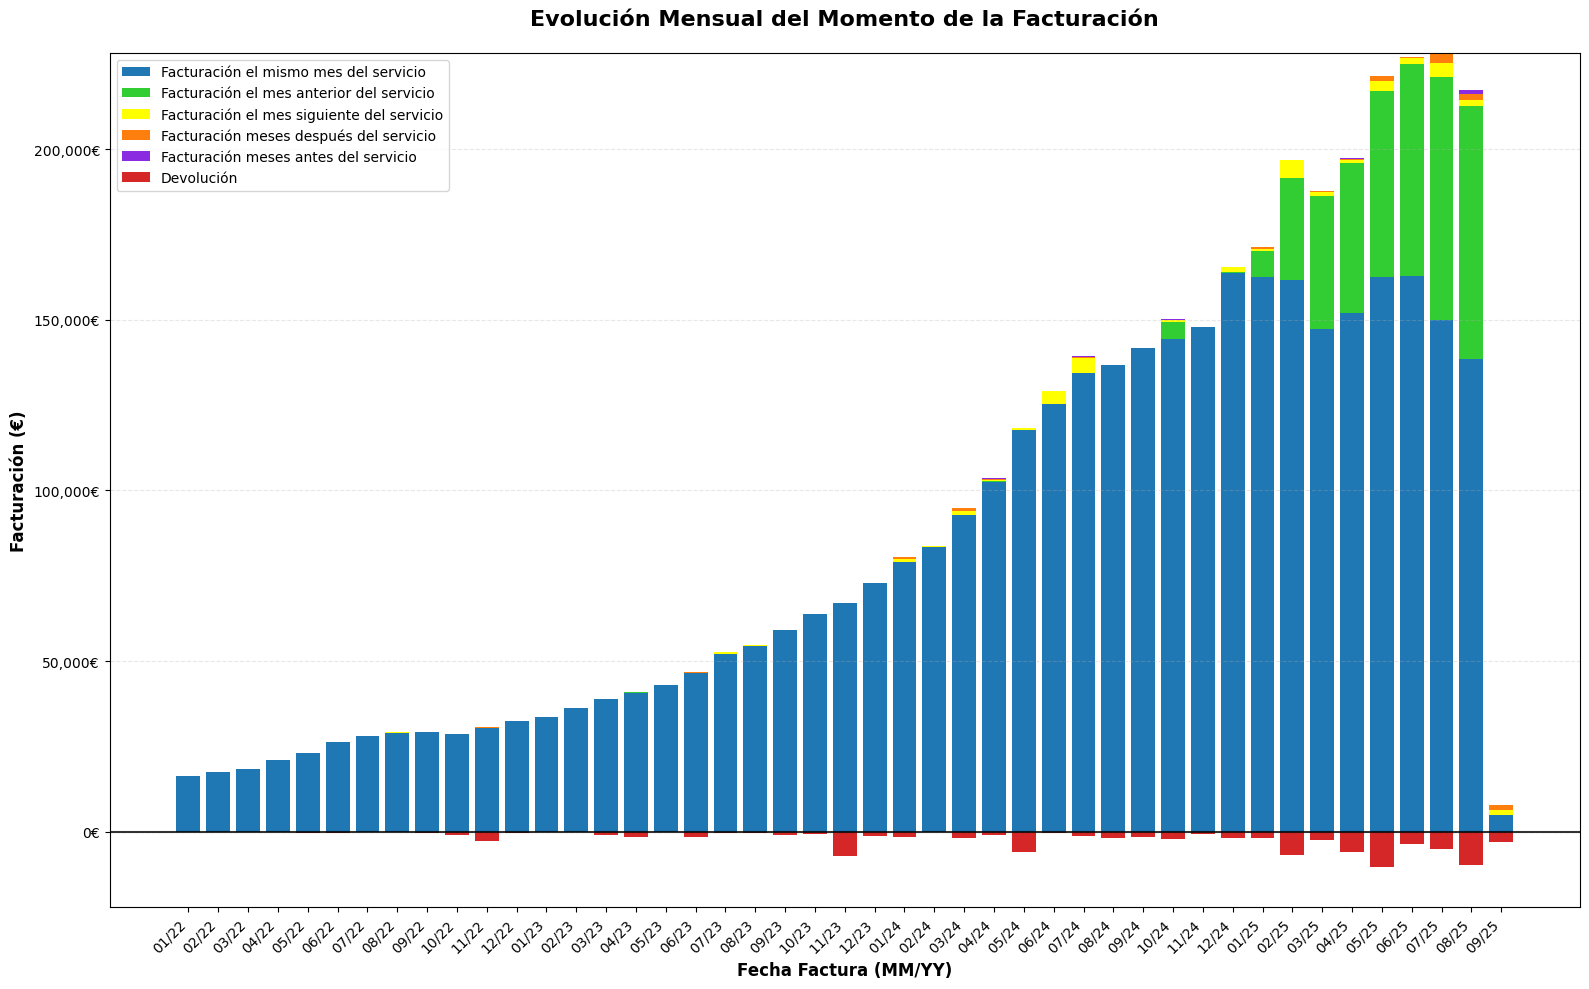

📊 ESTADÍSTICAS DE LA EVOLUCIÓN MENSUAL:
Valor máximo: 223,383.95€
Valor mínimo: 4,740.55€
Promedio mensual: 88,145.29€
Total de meses: 45


In [19]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

# Función para convertir fecha MM/YY a formato ordenable
def convertir_fecha_ordenable(fecha_str):
    """Convierte MM/YY a objeto datetime para ordenamiento correcto"""
    mes, año = fecha_str.split('/')
    return datetime(2000 + int(año), int(mes), 1)

# Preparar datos con ordenamiento cronológico correcto
df_resumen_con_fecha = df_resumen_ordenado.copy()
df_resumen_con_fecha['fecha_ordenable'] = df_resumen_con_fecha['Fecha factura'].apply(convertir_fecha_ordenable)

# Ordenar cronológicamente
df_resumen_con_fecha = df_resumen_con_fecha.sort_values('fecha_ordenable')

# Crear tabla pivote para el gráfico de barras apiladas
pivot_data = df_resumen_con_fecha.pivot_table(
    index='Fecha factura', 
    columns='Momento del pago', 
    values='Precio sin IVA acumulado', 
    fill_value=0
).reset_index()

# Obtener las fechas ordenadas cronológicamente
fechas_ordenadas = df_resumen_con_fecha.drop_duplicates('Fecha factura').sort_values('fecha_ordenable')['Fecha factura'].tolist()

# Reordenar el pivot según las fechas cronológicas
pivot_data = pivot_data.set_index('Fecha factura').reindex(fechas_ordenadas).reset_index()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(16, 10))

# Nueva paleta de colores más diferenciada y visualmente atractiva
colores = {
    'Pago el mismo mes del servicio': '#1f77b4',         # Azul brillante
    'Pago el mes siguiente del servicio': 'yellow',     # Naranja
    'Pago meses después del servicio': '#ff7f0e',        # Rosa
    'Pago el mes anterior del servicio': 'limegreen',    # Verdeamarillo
    'Pago meses antes del servicio': 'blueviolet',          # Púrpura
    'Devolución': '#d62728',                             # Rosa fuerte/magenta
    'Datos insuficientes': '#bcbd22'                     # Amarillo oliva
}

# Diccionario para cambiar los nombres en la leyenda
nombres_leyenda = {
    'Pago el mismo mes del servicio': 'Facturación el mismo mes del servicio',
    'Pago el mes siguiente del servicio': 'Facturación el mes siguiente del servicio',
    'Pago meses después del servicio': 'Facturación meses después del servicio',
    'Pago el mes anterior del servicio': 'Facturación el mes anterior del servicio',
    'Pago meses antes del servicio': 'Facturación meses antes del servicio',
    'Devolución': 'Devolución',
    'Datos insuficientes': 'Datos insuficientes'
}

# Variables para apilar las barras separando positivos y negativos
bottom_pos = None  # Para valores positivos (hacia arriba)
bottom_neg = None  # Para valores negativos (hacia abajo)
anchos_barra = 0.8

# Ordenar columnas por total de valores positivos (de mayor a menor)
columnas_ordenadas = []
for columna in pivot_data.columns[1:]:
    if columna in pivot_data.columns:
        valores_pos = pivot_data[columna].where(pivot_data[columna] >= 0, 0)
        total_pos = valores_pos.sum()
        columnas_ordenadas.append((columna, total_pos))

# Separar positivas y negativas, ordenar positivas por total descendente
columnas_pos = [(col, total) for col, total in columnas_ordenadas if total > 0]
columnas_neg = [(col, total) for col, total in columnas_ordenadas if total <= 0]
columnas_pos.sort(key=lambda x: x[1], reverse=True)  # Mayor a menor

# Combinar: primero positivas ordenadas, luego negativas
columnas_finales = [col for col, _ in columnas_pos] + [col for col, _ in columnas_neg]

# Crear barras apiladas separando valores positivos y negativos
for columna in columnas_finales:
    if columna in pivot_data.columns:
        valores = pivot_data[columna]
        color = colores.get(columna, '#34495E')  # Color por defecto si no está definido
        
        # Usar el nombre modificado para la leyenda, solo si no es "Datos insuficientes"
        label = nombres_leyenda.get(columna, columna) if columna != 'Datos insuficientes' else ""
        
        # Separar valores positivos y negativos
        valores_pos = valores.where(valores >= 0, 0)  # Solo valores positivos
        valores_neg = valores.where(valores < 0, 0)   # Solo valores negativos
        
        # Dibujar valores positivos (apilados hacia arriba)
        if valores_pos.sum() > 0:
            plt.bar(pivot_data['Fecha factura'], 
                   valores_pos, 
                   bottom=bottom_pos, 
                   label=label if valores_pos.sum() > 0 else "",
                   color=color,
                   width=anchos_barra,
                   alpha=1.0,
                   edgecolor='none',
                   linewidth=0)
            
            # Actualizar bottom_pos para la siguiente capa positiva
            if bottom_pos is None:
                bottom_pos = valores_pos
            else:
                bottom_pos = bottom_pos + valores_pos
        
        # Dibujar valores negativos (apilados hacia abajo)
        if valores_neg.sum() < 0:
            plt.bar(pivot_data['Fecha factura'], 
                   valores_neg, 
                   bottom=bottom_neg, 
                   label=label if valores_neg.sum() < 0 and valores_pos.sum() == 0 else "",
                   color=color,
                   width=anchos_barra,
                   alpha=1.0,
                   edgecolor='none',
                   linewidth=0)
            
            # Actualizar bottom_neg para la siguiente capa negativa
            if bottom_neg is None:
                bottom_neg = valores_neg
            else:
                bottom_neg = bottom_neg + valores_neg

# AÑADIR LÍNEA VERTICAL EN Y=0
plt.axhline(y=0, color='black', linewidth=1.5, linestyle='-', alpha=0.8)

# Personalización del gráfico
plt.title('Evolución Mensual del Momento de la Facturación', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Fecha Factura (MM/YY)', fontsize=12, fontweight='bold')
plt.ylabel('Facturación (€)', fontsize=12, fontweight='bold')

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Añadir grilla para mejor lectura
plt.grid(True, alpha=0.3, linestyle='--', axis='y')

# Formatear el eje Y con separadores de miles
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}€'))

# Añadir leyenda en la esquina superior izquierda del gráfico
plt.legend(loc='upper left', fontsize=10)

# Ajustar el layout para que no se corten las etiquetas
plt.tight_layout()

# Guardar el gráfico en PNG con alta calidad
plt.savefig('evolucion_mensual_momento_facturación.png', 
            dpi=300,           # Alta resolución
            bbox_inches='tight', # Ajustar márgenes automáticamente
            facecolor='white',   # Fondo blanco
            edgecolor='none')    # Sin borde

# Mostrar el gráfico
plt.show()

# Mostrar información adicional
totales_mensuales = pivot_data.iloc[:, 1:].sum(axis=1)
print("📊 ESTADÍSTICAS DE LA EVOLUCIÓN MENSUAL:")
print(f"Valor máximo: {totales_mensuales.max():,.2f}€")
print(f"Valor mínimo: {totales_mensuales.min():,.2f}€")
print(f"Promedio mensual: {totales_mensuales.mean():,.2f}€")
print(f"Total de meses: {len(pivot_data)}")